<a href="https://colab.research.google.com/github/sagarikaraje/TSF-GRIP-Internship/blob/main/Solution_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Sagarika Raje

## **Prediction using Supervised ML**

This regression task is to predict the percentage of a student is expected to score based upon the number of study hours. This is a simple linear regression task as it involves just two variables.

### Importing Libraries

In [1]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline

In [2]:
url = "http://bit.ly/w-data"
dataset = pd.read_csv(url)
dataset.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


Plotting our data points on 2-D graph to see if we can find any relationship between the data. 

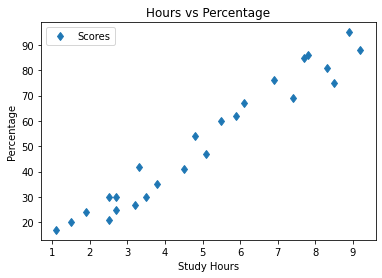

In [3]:
# Plotting the distribution of scores
dataset.plot(x='Hours', y='Scores', style='d')  
plt.title('Hours vs Percentage')  
plt.xlabel('Study Hours')  
plt.ylabel('Percentage')  
plt.show()

### Splitting Dataset for Predictions


In [4]:
X = dataset.iloc[:, :-1].values  
y = dataset.iloc[:, 1].values  

In [5]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.2, random_state=0) 

### Training our Model

In [6]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 

print("Training complete.")

Training complete.


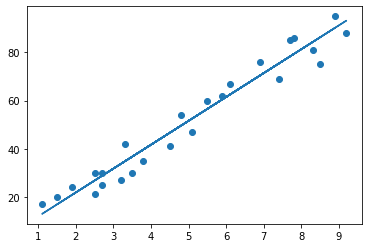

In [7]:
# regression line plotting
line = regressor.coef_*X+regressor.intercept_
#as equation of a line is y=mx+c

# test data plotting
plt.scatter(X, y)
plt.plot(X, line);
plt.show()

In [8]:
X_test

array([[1.5],
       [3.2],
       [7.4],
       [2.5],
       [5.9]])

### Predicting the Results

In [9]:
print(X_test) # Testing data 
y_pred = regressor.predict(X_test) # Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [10]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [11]:
hours = np.array(9.25).reshape(1,1)
own_pred = regressor.predict(hours)
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = [[9.25]]
Predicted Score = 93.69173248737539


### Evaluating the model

In [12]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 4.183859899002982
